In [1]:
import pandas as pd

In [2]:
# Load the dataset
titanic_df = pd.read_csv('titanic-dataset.csv')

# Display the first few rows of the dataframe
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA (Exploratory Data Analysis)

In [3]:
# Basic data exploration

# Dataset structure
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Summary statistics for numerical features
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_df.shape

(891, 12)

In [6]:
# Count of missing values for each column
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Preprocessing (will cover in detail later)

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
# Impute missing values for 'Age' with the median
age_imputer = SimpleImputer(strategy='median')
titanic_df['Age'] = age_imputer.fit_transform(titanic_df[['Age']])

In [9]:
# For 'Embarked', we fill missing values with the mode (most common value)
embarked_mode = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'].fillna(embarked_mode, inplace=True)

/var/folders/3q/r2zc74911hn2f967w656zszm0000gn/T/ipykernel_36709/871486133.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Embarked'].fillna(embarked_mode, inplace=True)


In [10]:
# Drop 'Cabin' column due to a high number of missing values
titanic_df.drop(columns=['Cabin'], inplace=True)

In [11]:
# Feature Engineering: Create a new column 'FamilySize' as a sum of 'SibSp' + 'Parch' + 1
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

In [12]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [13]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
dtype: int64

# Visualizations

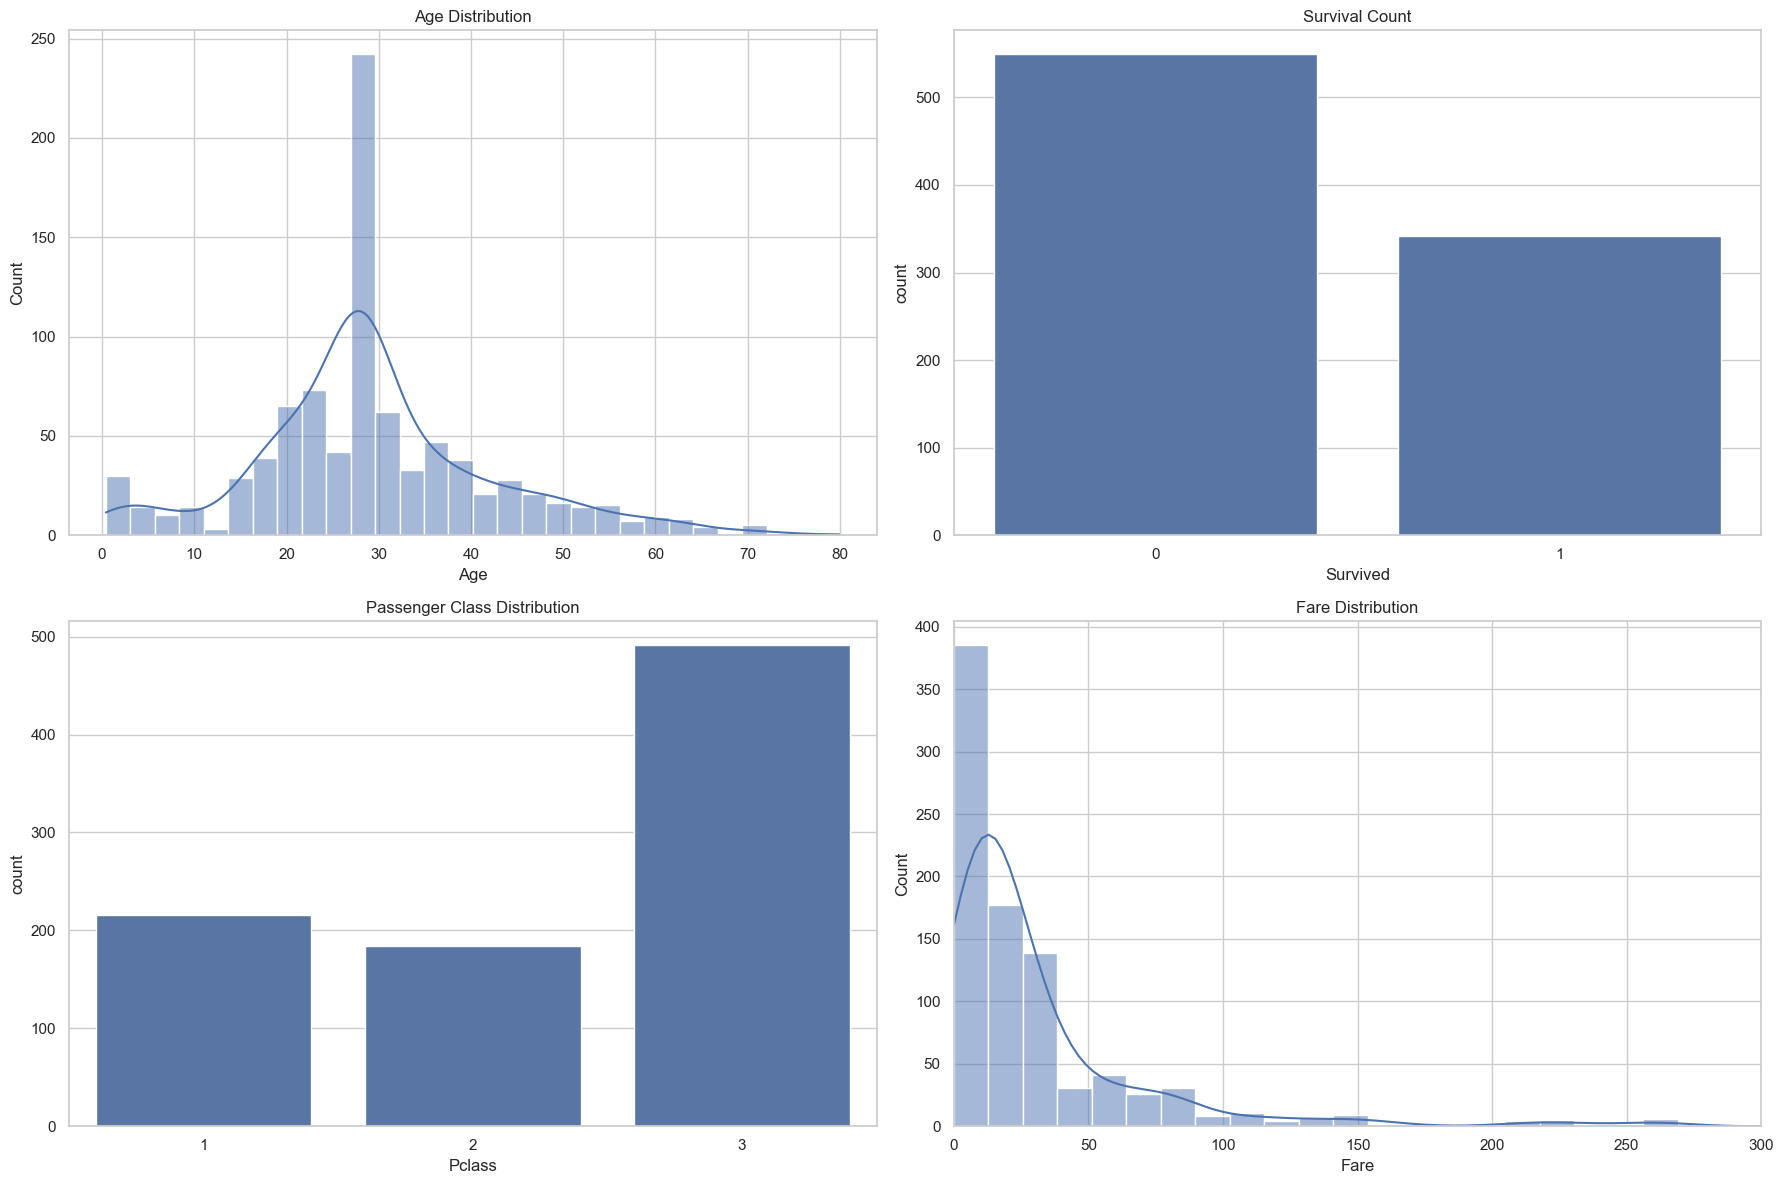

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for seaborn plots
sns.set(style="whitegrid")

# Visualize the distribution of key variables
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Histogram of Age
sns.histplot(titanic_df['Age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Bar plot of Survival Count
sns.countplot(x='Survived', data=titanic_df, ax=axes[0, 1])
axes[0, 1].set_title('Survival Count')

# Bar plot of Passenger Class
sns.countplot(x='Pclass', data=titanic_df, ax=axes[1, 0])
axes[1, 0].set_title('Passenger Class Distribution')

# Histogram of Fare
sns.histplot(titanic_df['Fare'], bins=40, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Fare Distribution')
axes[1, 1].set_xlim(0, 300) # Limiting x-axis due to long tail

plt.tight_layout()
plt.show()


/var/folders/3q/r2zc74911hn2f967w656zszm0000gn/T/ipykernel_36709/662668023.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Survived", y="Age", data=titanic_df, palette="muted", split=True, ax=axes[0, 0])


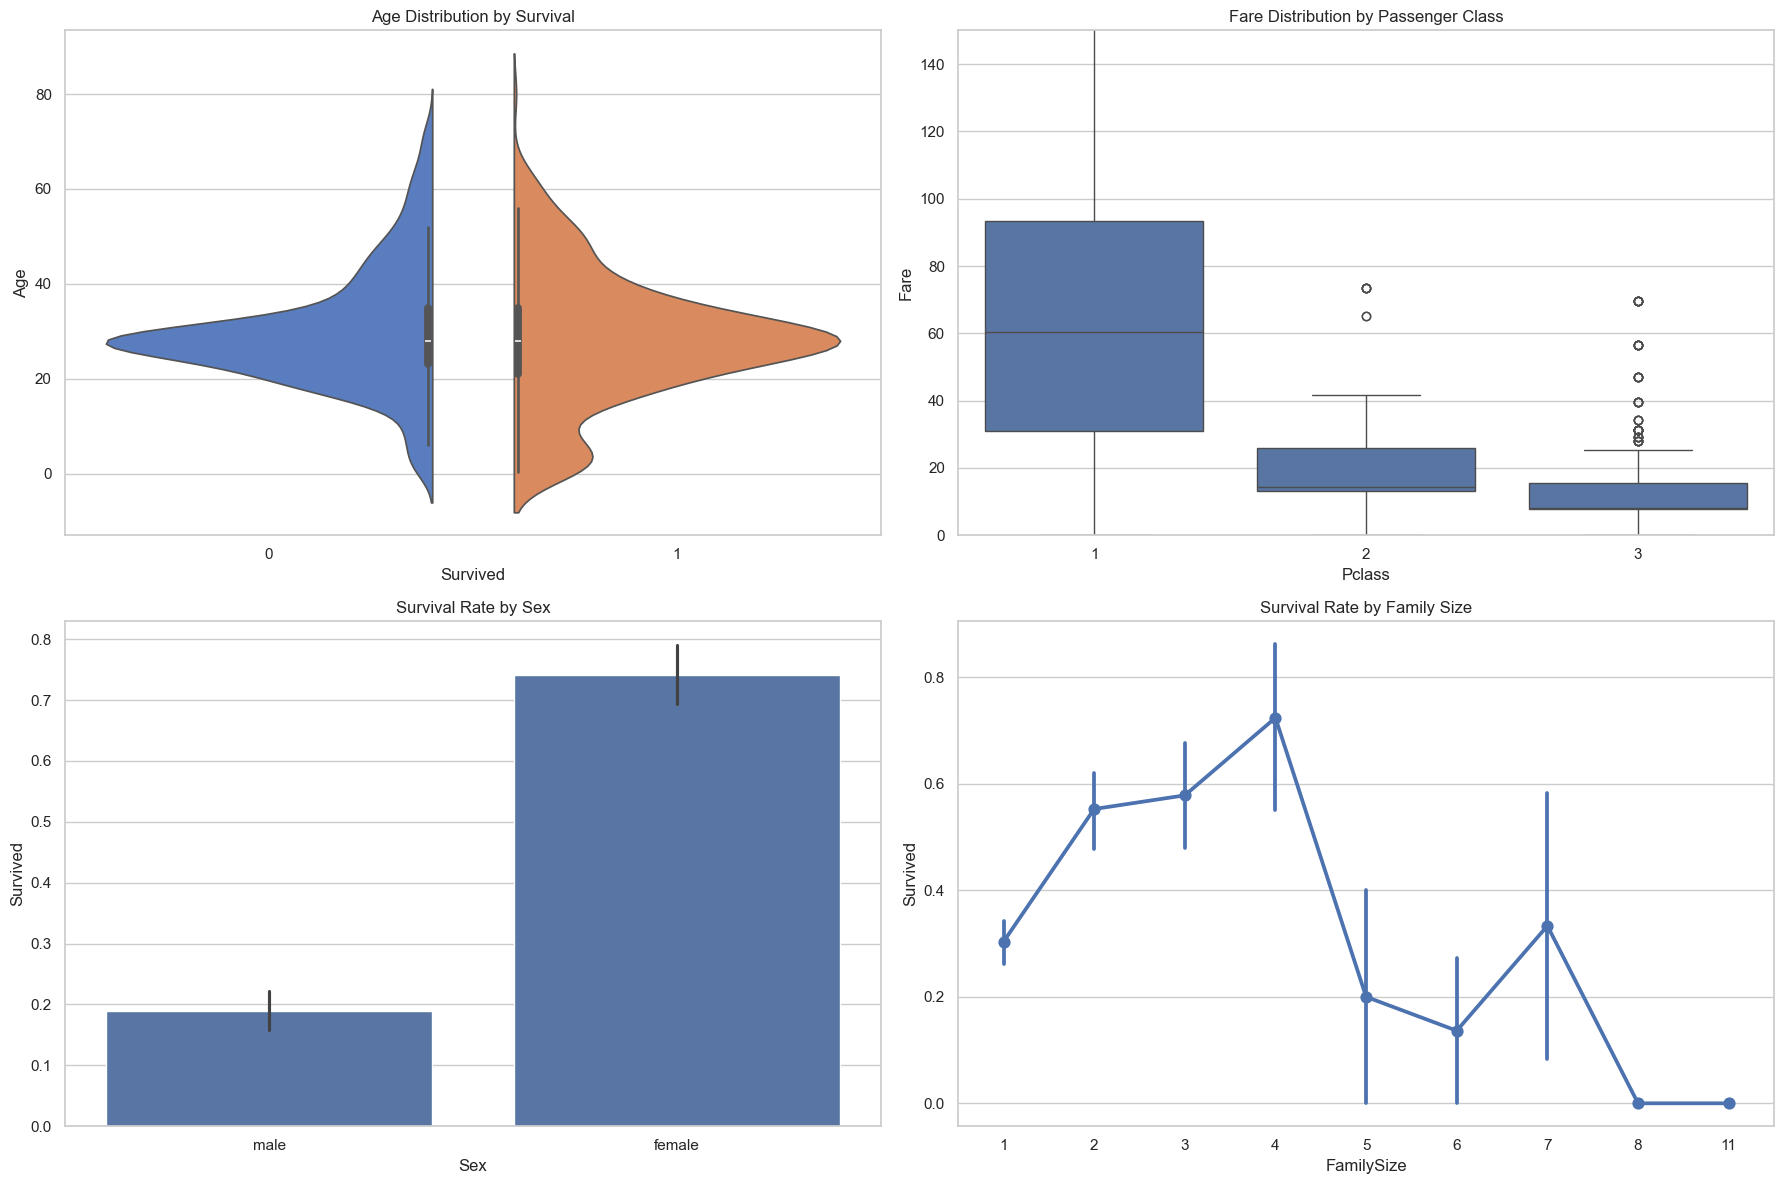

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Violin plot for Age distribution by Survival
sns.violinplot(x="Survived", y="Age", data=titanic_df, palette="muted", split=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution by Survival')

# Box plot of Fares by Passenger Class
sns.boxplot(x="Pclass", y="Fare", data=titanic_df, ax=axes[0, 1])
axes[0, 1].set_title('Fare Distribution by Passenger Class')
axes[0, 1].set_ylim(0, 150) # Limiting y-axis due to outliers

# Survival rate by Sex
sns.barplot(x="Sex", y="Survived", data=titanic_df, ax=axes[1, 0])
axes[1, 0].set_title('Survival Rate by Sex')

# Survival rate by Family Size
sns.pointplot(x="FamilySize", y="Survived", data=titanic_df, ax=axes[1, 1])
axes[1, 1].set_title('Survival Rate by Family Size')

plt.tight_layout()
plt.show()


In [16]:
# Count the number of males and females in the dataset
titanic_df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [17]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [18]:
# Encode sex column
titanic_df["Sex"] = titanic_df["Sex"].apply(lambda x: 0 if x == "male" else 1)

In [20]:
titanic_df.drop(columns=['SibSp', 'Parch'], inplace=True)

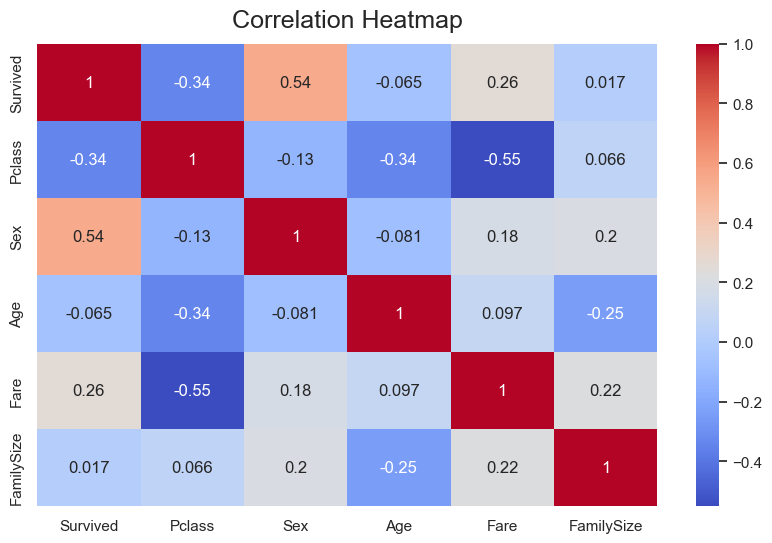

In [21]:
# Plot the heatmap of numeric features
numeric_features = titanic_df.select_dtypes(include=['int64', 'float64']).drop(columns=['PassengerId'])
corr = numeric_features.corr()

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(corr, annot=True, cmap="coolwarm")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)
plt.show()

# Insights from the Titanic Dataset Analysis

## Key Observations

### 1. Age Distribution
- The passengers aboard the Titanic ranged widely in age, from infants to the elderly. The age distribution showed a slight skew towards younger passengers, with a bimodal distribution indicating peaks among younger and middle-aged groups.

### 2. Survival Count
- A larger number of passengers did not survive the disaster compared to those who did. This highlights the tragic outcome of the event, where less than half of the passengers survived.

### 3. Passenger Class Distribution
- The majority of passengers were in the 3rd class, indicating that the Titanic was primarily carrying passengers of lower economic status. The distribution across classes underscores the socio-economic diversity of the passengers.

### 4. Fare Distribution
- Fare distribution was highly skewed, with most passengers paying low to moderate fares and a few outliers paying very high fares. This reflects economic disparities and the varying levels of luxury and comfort experienced by passengers aboard the Titanic.

## Advanced Insights

### 5. Age and Survival
- The violin plot revealed that age distribution by survival status was somewhat similar across survivors and non-survivors, with younger passengers showing a slightly higher likelihood of survival.

### 6. Economic Disparities and Survival
- Box plots of fare distribution by passenger class illustrated stark economic disparities. Passengers in the 1st class, who paid significantly higher fares, had access to better amenities, which may have also influenced their survival chances.

### 7. Gender and Survival
- Gender played a crucial role in survival, with females having a significantly higher survival rate than males. This supports historical accounts that women were given priority in life-saving measures.

### 8. Family Size and Survival
- The survival rate varied with family size, with small to medium-sized families (2-4 members) having higher survival rates. Individuals and large families faced disadvantages, likely due to the lack of support or the challenges in coordinating evacuation efforts.

## Conclusion

The analysis of the Titanic dataset using pandas and advanced visualizations with Matplotlib and Seaborn has provided deep insights into the factors that influenced survival aboard the Titanic. Age, economic status, gender, and family size were all significant factors, each contributing to the complex dynamics of survival during the disaster. These insights not only help us understand the tragic event better but also showcase the power of data analysis and visualization in uncovering underlying patterns and stories within historical data.
